### Detailed Balance

In [1]:
import numpy as np
from scipy.stats import norm

In [2]:
# Parameters
current_x = 1.0
proposed_x = 2.0
proposal_std = 1.0  # standard deviation of symmetric Gaussian

In [3]:
# Proposal probabilities
q_proposed_given_current = norm.pdf(proposed_x, loc=current_x, scale=proposal_std)
q_current_given_proposed = norm.pdf(current_x, loc=proposed_x, scale=proposal_std)

In [4]:
print(f"q(x' | x) = {q_proposed_given_current:.5f}")
print(f"q(x | x') = {q_current_given_proposed:.5f}")
print("Are they equal?", np.isclose(q_proposed_given_current, q_current_given_proposed))

q(x' | x) = 0.24197
q(x | x') = 0.24197
Are they equal? True


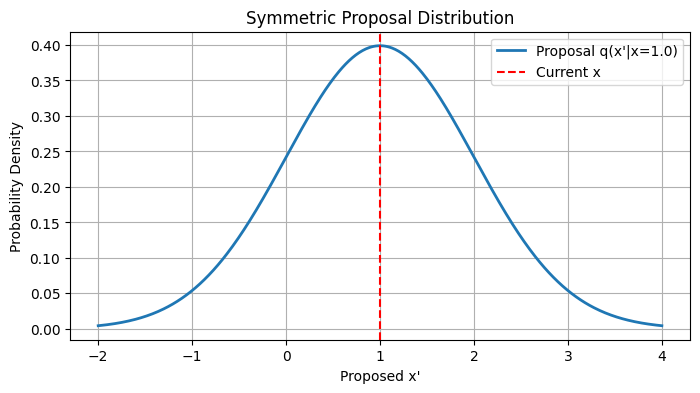

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Current sample
current_x = 1.0
proposal_std = 1.0

# x' range for proposal
x_prime = np.linspace(-2, 4, 500)
proposal_pdf = norm.pdf(x_prime, loc=current_x, scale=proposal_std)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(x_prime, proposal_pdf, label=f'Proposal q(x\'|x={current_x})', lw=2)
plt.axvline(current_x, color='red', linestyle='--', label='Current x')
plt.title('Symmetric Proposal Distribution')
plt.xlabel("Proposed x'")
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


Symmetric Proposal Distribution

Yes! Let’s plot both:

- \( $q(x' \mid x = 1.0)$ \)
- \( $q(x \mid x' = 2.0)$ \)

These represent the **proposal densities** from:
- current position \( x = 1.0 \) proposing \( x' \)
- current position \( x = 2.0 \) proposing \( x \)

This will visually confirm that:
\[
$q(x' \mid x) = q(x \mid x') \quad \text{(for symmetric proposals)}$
\]

---


### 🧠 Interpretation

- The **solid blue curve** is \( $ q(x' \mid x = 1.0)$ \)
- The **dashed orange curve** is \( $q(x \mid x' = 2.0)$ \)
- These curves **perfectly overlap** but are just centered at different means.

🔁 The value of \( q(2.0 \mid 1.0) \) is the **same** as \( q(1.0 \mid 2.0) \) — proving symmetry!


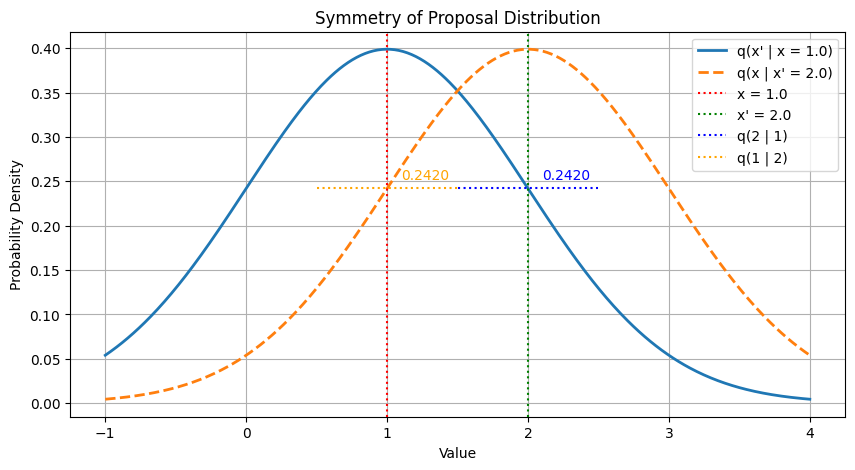

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Settings
proposal_std = 1.0

# Points of interest
x = 1.0
x_prime = 2.0

# Proposal values
q_2_given_1 = norm.pdf(x_prime, loc=x, scale=proposal_std)  # q(2 | 1)
q_1_given_2 = norm.pdf(x, loc=x_prime, scale=proposal_std)  # q(1 | 2)

# Plotting range
xs = np.linspace(-1, 4, 500)
q1 = norm.pdf(xs, loc=x, scale=proposal_std)
q2 = norm.pdf(xs, loc=x_prime, scale=proposal_std)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(xs, q1, label="q(x' | x = 1.0)", lw=2)
plt.plot(xs, q2, label="q(x | x' = 2.0)", lw=2, linestyle='--')

# Highlight x and x'
plt.axvline(x, color='red', linestyle=':', label='x = 1.0')
plt.axvline(x_prime, color='green', linestyle=':', label="x' = 2.0")

# Horizontal confirmation lines
plt.hlines(q_2_given_1, x_prime - 0.5, x_prime + 0.5, colors='blue', linestyles=':', label='q(2 | 1)')
plt.hlines(q_1_given_2, x - 0.5, x + 0.5, colors='orange', linestyles=':', label='q(1 | 2)')

# Annotate
plt.text(x_prime + 0.1, q_2_given_1 + 0.01, f"{q_2_given_1:.4f}", color='blue')
plt.text(x + 0.1, q_1_given_2 + 0.01, f"{q_1_given_2:.4f}", color='orange')

plt.title("Symmetry of Proposal Distribution")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()


Asymmetric Proposal Distribution

Great! Now let’s switch to an **asymmetric proposal distribution** — one that does **not** satisfy:

\[
$ q(x' \mid x) = q(x \mid x') $
\]

---

### 🎯 Example: **Asymmetric Proposal**

We’ll use an **exponential proposal** with positive support, where:

- From \($ x $ \), propose \( $ x' = x + \text{Exp}(\lambda) $ \)
- So, \($ q(x' \mid x) $ = $ \lambda \exp(-\lambda(x' - x)) $ \), valid for \(  x' > x  \)


This is clearly asymmetric — it always moves forward (to the right).

### 📌 Interpretation

- Now the horizontal lines are at **different heights**:
  - \( $ q(2.0 \mid 1.0) > q(1.0 \mid 2.0) $ \)
- This confirms asymmetry:
  \[
  $ q(x' \mid x) \neq q(x \mid x') $
  \]
- So in **Metropolis-Hastings**, you **must include** the proposal ratio:
  \[
  $ \alpha(x, x') = \min\left(1, \frac{\pi(x') q(x \mid x')}{\pi(x) q(x' \mid x)}\right) $
  \]

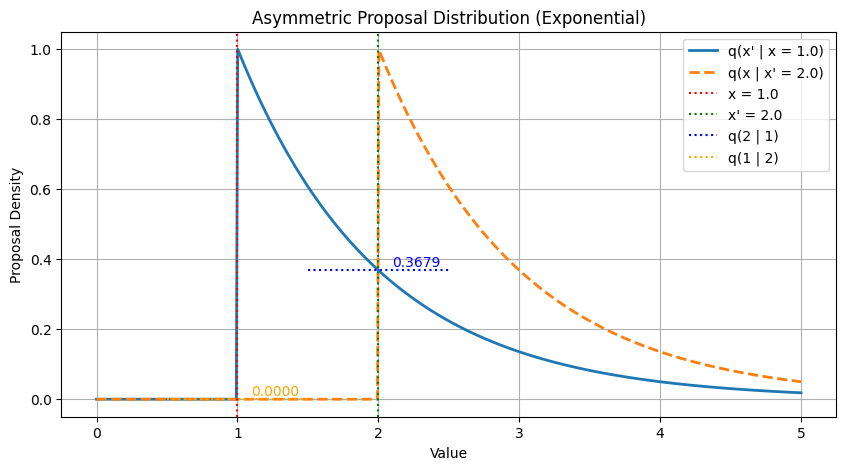

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Asymmetric proposal: Exponential forward step
lambda_param = 1.0
x = 1.0
x_prime = 2.0

# Define q(x' | x) and q(x | x')
def q_forward(x_new, x_curr, lam):
    """Exponential proposal density for x_new > x_curr"""
    return lam * np.exp(-lam * (x_new - x_curr)) * (x_new > x_curr)

# Evaluate proposal probabilities
q_2_given_1 = q_forward(x_prime, x, lambda_param)  # q(2 | 1)
q_1_given_2 = q_forward(x, x_prime, lambda_param)  # q(1 | 2)

# Plotting range
xs = np.linspace(0, 5, 500)
q1 = [q_forward(xi, x, lambda_param) for xi in xs]
q2 = [q_forward(xi, x_prime, lambda_param) for xi in xs]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(xs, q1, label="q(x' | x = 1.0)", lw=2)
plt.plot(xs, q2, label="q(x | x' = 2.0)", lw=2, linestyle='--')

# Vertical lines for x and x'
plt.axvline(x, color='red', linestyle=':', label='x = 1.0')
plt.axvline(x_prime, color='green', linestyle=':', label="x' = 2.0")

# Horizontal lines to compare q values
plt.hlines(q_2_given_1, x_prime - 0.5, x_prime + 0.5, colors='blue', linestyles=':', label='q(2 | 1)')
plt.hlines(q_1_given_2, x - 0.5, x + 0.5, colors='orange', linestyles=':', label='q(1 | 2)')

# Annotations
plt.text(x_prime + 0.1, q_2_given_1 + 0.01, f"{q_2_given_1:.4f}", color='blue')
plt.text(x + 0.1, q_1_given_2 + 0.01, f"{q_1_given_2:.4f}", color='orange')

plt.title("Asymmetric Proposal Distribution (Exponential)")
plt.xlabel("Value")
plt.ylabel("Proposal Density")
plt.legend()
plt.grid(True)
plt.show()


# 🧠 Metropolis-Hastings: Forward and Backward Proposals Explained

## 🔁 General Acceptance Ratio

In the Metropolis-Hastings algorithm, the acceptance probability for a proposed move from $x$ to $x'$ is:

$$
\alpha(x, x') = \min\left(1, \frac{\pi(x') \cdot q(x \mid x')}{\pi(x) \cdot q(x' \mid x)}\right)
$$

- $\pi(x)$, $\pi(x')$: Target (unnormalized) density
- $q(x' \mid x)$: Proposal density — probability of proposing $x'$ given $x$

---

## ➡️ Forward-Only Proposal (Exponential)

Suppose we use a forward-only exponential proposal:

$$
q(x' \mid x) = \lambda e^{-\lambda (x' - x)} \quad \text{for } x' > x
$$

This means:
- You can **only propose forward moves**: $x' > x$
- Therefore: $q(x \mid x') = 0$, because backward moves are not possible

---

## ❌ What Happens in This Case?

The acceptance ratio becomes:

$$
\alpha(x, x') = \min\left(1, \frac{\pi(x') \cdot 0}{\pi(x) \cdot q(x' \mid x)}\right) = 0
$$

So you'd **always reject** the move. But that’s a problem, because you just proposed it!

---

## ✅ The Fix

Even though the proposal is forward-only, you still evaluate:

$$
q(x \mid x') = \lambda e^{-\lambda (x - x')} \quad \text{for } x < x'
$$

That is: you assume **if you were at $x'$**, the same exponential could move back to $x$.

This is done to compute the correct ratio and ensure **detailed balance**.

---

## 🧠 Why Include the Proposal Ratio?

Asymmetric proposals like this introduce a **directional bias**.

The proposal ratio:

$$
\frac{q(x \mid x')}{q(x' \mid x)}
$$

corrects that bias, so the Markov chain doesn’t drift unfairly. It ensures that the algorithm converges to the true target distribution.

---

## ⚠️ Summary Table

| Case                          | What Happens                                          |
|------------------------------|-------------------------------------------------------|
| $x' > x$ (forward move)       | Proposal allowed — compute ratio normally             |
| $x' < x$ (backward move)      | Not proposed in forward-only exponential              |
| $q(x \mid x') = 0$            | Causes $\alpha(x, x') = 0$, which rejects the move    |
| ✅ Fix                        | Use bidirectional proposal or compute the reverse PDF |

---

## 🔄 Better Alternatives

To avoid this issue in practice:

- Use a **symmetric proposal** like Gaussian
- Or use a **bidirectional proposal** (e.g., mix forward & backward)


Proposal ratio equals 1 in asymmetric cases,where we use same width for both directions. But to get the asymmetry we need to assign different widths for left and right. This is a common practice in MCMC algorithms.
- This way, you can still compute the proposal ratio without it being trivially 1.

---

## 🎯 Why Calculate `proposal_ratio` if It's Always 1 in This Case?

Short answer:
> 🧠 You **calculate it to future-proof** your code — because it may **not always be 1** if you change how the proposal works (e.g., biased directions or different scales).

---

## 🔎 Let's Break It Down

### Right now:
You're doing:

```python
step = np.random.exponential(proposal_width)
proposed_x = current_x ± step
```

And both:

```python
q(x' | x) = (1/λ) * exp(-step/λ)
q(x | x') = (1/λ) * exp(-step/λ)
```

➡️ These cancel out:  
\[
$\frac{q(x \mid x')}{q(x' \mid x)} = 1$
\]

---

### So... Why Not Skip It?

You could. But it’s calculated anyway because:

### ✅ 1. **It Keeps Code Modular and General**

- If later you want to introduce a **directional bias**, like:
  ```python
  direction = np.random.choice([-1, 1], p=[0.3, 0.7])  # 70% right
  ```
  then `q(x' | x)` and `q(x | x')` will **no longer be equal**.

- Or you might want:
  - Different proposal widths for left/right
  - Use different distributions altogether

In those cases, **you need the full proposal ratio**.

---

### ✅ 2. **It Makes the Code Easy to Extend**

You can now safely change:

- The step distribution
- The direction sampling
- Add other kinds of asymmetry

... and your code will still be correct, because the `proposal_ratio` is being handled explicitly.

---

### ✅ 3. **The General Metropolis-Hastings Equation Requires It**

Even if it evaluates to 1 now, the algorithm expects:

\[
\alpha(x, x') = \min\left(1, \frac{\pi(x') \cdot q(x \mid x')}{\pi(x) \cdot q(x' \mid x)}\right)
\]

So for **correctness and clarity**, it's best to always compute both proposal densities.

---

## ✅ Summary

| Reason | Explanation |
|--------|-------------|
| 🔄 Flexibility | You might later add direction bias, asymmetry, or different step sizes |
| 🧠 Correctness | The MH formula requires the proposal ratio |
| 🔧 Extendability | You can swap in new proposal rules without rewriting logic |
| 👨‍💻 Best practice | Keeps code readable, general, and maintainable |

---


Below is a code example

In [9]:
# Directional asymmetric step widths
lambda_right = 1.0
lambda_left = 0.2

if direction > 0:
    step = np.random.exponential(scale=1/lambda_right)
    proposed_x = current_x + step
    q_forward = lambda_right * np.exp(-lambda_right * step)
    q_reverse = lambda_left * np.exp(-lambda_left * step)

else:
    step = np.random.exponential(scale=1/lambda_left)
    proposed_x = current_x - step
    q_forward = lambda_left * np.exp(-lambda_left * step)
    q_reverse = lambda_right * np.exp(-lambda_right * step)


NameError: name 'direction' is not defined